#### import all the necessary library that we have to used in the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
data = load_boston()  # we have to create the object of data
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# we have created these data in DataFrame
df = pd.DataFrame(data.data,columns=data.feature_names)

In [19]:
# we have created target name as House_sell
df['House_sell'] = data.target

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_sell
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
# we have to check null values
df.isna().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
House_sell    0
dtype: int64

<AxesSubplot:>

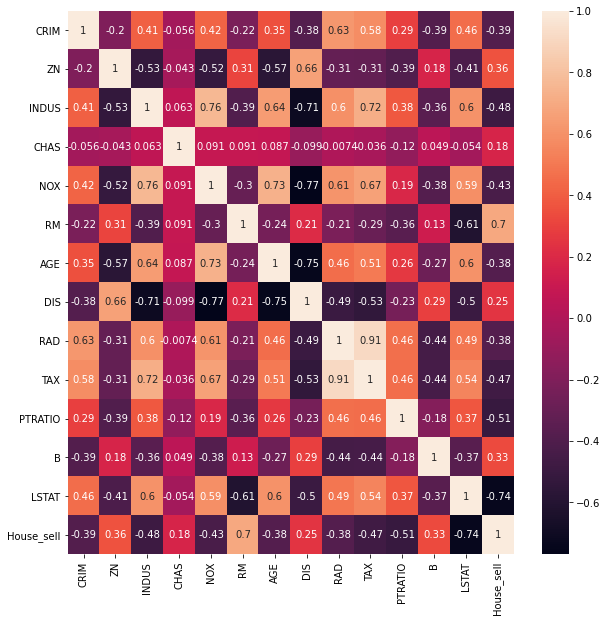

In [26]:
# we have to check correlation between the data
# first we have to import seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [32]:
# we have to split our data:
x = df.drop(['House_sell'],axis=1) # independent variable

y = df['House_sell'] # dependent variable

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

"""test_size = 0.3 means 30% data is for testing and rest for training and random_state = 42
 means it is basically used to control for shuffling"""

'test_size = 0.3 means 30% data is for testing and rest for training and random_state = 42\n means it is basically used to control for shuffling'

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (354, 13) (152, 13)


In [37]:
# we are usig linear_regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()   # creating the object

In [38]:
model.fit(x_train,y_train) # we have to fit the model

LinearRegression()

In [47]:
model.coef_.round(1)  # these are the coefficient values

array([ -0.1,   0. ,   0. ,   3.1, -15.4,   4.1,  -0. ,  -1.4,   0.2,
        -0. ,  -0.9,   0. ,  -0.5])

In [48]:
model.intercept_ # this is the intercept values

31.631084035692954

In [51]:
# we have to predict our model
y_pred = model.predict(x_test).round(2)

In [52]:
# we have to check the accuracy score 
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

#### for testing data

In [58]:
print(r2_score(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.7111851901694947
4.63901773291672


#### for trainig data

In [61]:
print(r2_score(y_train,model.predict(x_train)))
print(sqrt(mean_squared_error(y_train,model.predict(x_train))))

0.7434997532004697
4.748208239685937


#### visulalization in testing data

Text(0.5, 1.0, 'Actual vs Predicted')

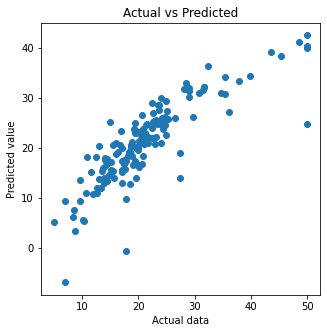

In [74]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
#lt.plot(y_test,y_pred)
plt.xlabel('Actual data')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

#### visulization on training data

Text(0.5, 1.0, 'Actual vs Predicted ')

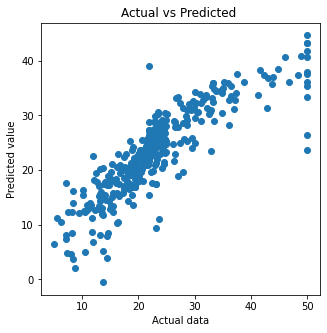

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,model.predict(x_train))
plt.xlabel('Actual data')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted ')

##### we can check our actual and predicted values in DataFrame also

In [84]:
train_predictions = pd.DataFrame({'Actual':y_train,'Predicted':model.predict(x_train).round(1)})

In [85]:
train_predictions.head(10)

,Actual,Predicted
5,28.7,25.3
116,21.2,23.7
45,19.3,22.2
16,23.1,21.3
468,19.1,16.8
360,25.0,23.4
3,33.4,29.0
405,5.0,6.4
185,29.6,24.1
60,18.7,17.3


In [88]:
test_predictions = pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test).round(1)})

In [90]:
test_predictions.head(10)

,Actual,Predicted
173,23.6,28.6
274,32.4,36.5
491,13.6,15.4
72,22.8,25.4
452,16.1,18.9
76,20.0,23.1
316,17.8,17.4
140,14.0,14.1
471,19.6,23.0
500,16.8,20.6
